# Movielens Case Study

In [562]:
import pandas as pd
import numpy as np
import datetime
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [563]:
%config IPCompleter.greedy=True

In [564]:
m=pd.read_table('movies.dat',sep='::',header=None,names=["MovieID","Name","Type"])

C:\Users\SaaiM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [565]:
m

,MovieID,Name,Type
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [566]:
m.Type.unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [567]:
import re
m["Comedy"] = [re.search("Comedy", m["Type"][i])!=None for i in range(m.shape[0])]
m["Romance"] = [re.search("Romance", m["Type"][i])!=None for i in range(m.shape[0])]
m["Drama"] = [re.search("Drama", m["Type"][i])!=None for i in range(m.shape[0])]
m["Adventure"] = [re.search("Adventure", m["Type"][i])!=None for i in range(m.shape[0])]
m["Fantasy"] = [re.search("Fantasy", m["Type"][i])!=None for i in range(m.shape[0])]
m["Children's"] = [re.search("Children's", m["Type"][i])!=None for i in range(m.shape[0])]
m["War"] = [re.search("War", m["Type"][i])!=None for i in range(m.shape[0])]
m["Horror"] = [re.search("Horror", m["Type"][i])!=None for i in range(m.shape[0])]
m["Sci-Fi"] = [re.search("Sci-Fi", m["Type"][i])!=None for i in range(m.shape[0])]
m["Crime"] = [re.search("Crime", m["Type"][i])!=None for i in range(m.shape[0])]
m["Western"] = [re.search("Western", m["Type"][i])!=None for i in range(m.shape[0])]
m["Musical"] = [re.search("Musical", m["Type"][i])!=None for i in range(m.shape[0])]
m["Animation"] = [re.search("Animation", m["Type"][i])!=None for i in range(m.shape[0])]
m["Thriller"] = [re.search("Drama", m["Type"][i])!=None for i in range(m.shape[0])]
m["Mystery"] = [re.search("Mystery", m["Type"][i])!=None for i in range(m.shape[0])]
m["Film-Noir"] = [re.search("Film-Noir", m["Type"][i])!=None for i in range(m.shape[0])]
m["Documentary"] = [re.search("Documentary", m["Type"][i])!=None for i in range(m.shape[0])]
m["Action"] = [re.search("Action", m["Type"][i])!=None for i in range(m.shape[0])]

In [568]:
m = m.drop(["Type"], axis=1)

In [569]:
m

,MovieID,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,Horror,Sci-Fi,Crime,Western,Musical,Animation,Thriller,Mystery,Film-Noir,Documentary,Action
0,1,Toy Story (1995),True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
1,2,Jumanji (1995),False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II (1995),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3879,3949,Requiem for a Dream (2000),False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3880,3950,Tigerland (2000),False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3881,3951,Two Family House (2000),False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [570]:
new = [re.search("([0-9]{4})", m["Name"][i]).group() for i in range(m.shape[0])]
new

['1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1994',
 '1995',
 '1994',
 '1995',
 '1995',
 '1995',
 '1995',
 '1994',
 '1995',
 '1995',
 '1996',
 '1995',
 '1996',
 '1996',
 '1996',
 '1996',
 '1995',
 '1995',
 '1995',
 '1996',
 '1995',
 '1995',
 '1995',
 '1996',
 '1996',
 '1995',
 '1995',
 '1995',
 '1996',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1996',
 '1996',
 '1996',
 '1995',
 '1995',
 '1996',
 '1995',
 '1996',
 '1996',
 '1995',
 '1995',
 '1994',
 '1995',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1995',
 '1994',
 '1996',
 '1995',
 '1995',
 '1995',
 '1976',
 '1995',
 

In [571]:
m["Year"] = new

In [572]:
m

,MovieID,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,Horror,...,Crime,Western,Musical,Animation,Thriller,Mystery,Film-Noir,Documentary,Action,Year
0,1,Toy Story (1995),True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,1995
1,2,Jumanji (1995),False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,1995
2,3,Grumpier Old Men (1995),True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
3,4,Waiting to Exhale (1995),True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1995
4,5,Father of the Bride Part II (1995),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2000
3879,3949,Requiem for a Dream (2000),False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2000
3880,3950,Tigerland (2000),False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2000
3881,3951,Two Family House (2000),False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2000


In [573]:
u=pd.read_table('users.dat',sep='::',header=None,names=["UserID","Gender","Age","Occupation","Zip-code"])

C:\Users\SaaiM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [574]:
u

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [575]:
r=pd.read_table('ratings.dat',sep='::',header=None,names=["UserID","MovieID","Rating","Timestamp"])

C:\Users\SaaiM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [576]:
r

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [577]:
#Master_Data = pd.concat(, ignore_index=True)
Master_Data = r.set_index('MovieID').join(m.set_index('MovieID'))

In [578]:
Master_Data

,UserID,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,...,Crime,Western,Musical,Animation,Thriller,Mystery,Film-Noir,Documentary,Action,Year
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1,5,978824268,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
1,6,4,978237008,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
1,8,4,978233496,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
1,9,5,978225952,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
1,10,5,978226474,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,5812,4,992072099,"Contender, The (2000)",False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,2000
3952,5831,3,986223125,"Contender, The (2000)",False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,2000
3952,5837,4,1011902656,"Contender, The (2000)",False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,2000


In [579]:
Master_Data = Master_Data.set_index('UserID').join(u.set_index('UserID'))

In [580]:
Master_Data

,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,...,Thriller,Mystery,Film-Noir,Documentary,Action,Year,Gender,Age,Occupation,Zip-code
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,978824268,Toy Story (1995),True,False,False,False,False,True,False,...,False,False,False,False,False,1995,F,1,10,48067
1,5,978824351,Pocahontas (1995),False,True,False,False,False,True,False,...,False,False,False,False,False,1995,F,1,10,48067
1,5,978301777,Apollo 13 (1995),False,False,True,False,False,False,False,...,True,False,False,False,False,1995,F,1,10,48067
1,4,978300760,Star Wars: Episode IV - A New Hope (1977),False,False,False,True,True,False,False,...,False,False,False,False,True,1977,F,1,10,48067
1,5,978824195,Schindler's List (1993),False,False,True,False,False,False,True,...,True,False,False,False,False,1993,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,4,960971696,Blood Simple (1984),False,False,True,False,False,False,False,...,True,False,True,False,False,1984,M,25,6,11106
6040,4,964828575,Mad Max 2 (a.k.a. The Road Warrior) (1981),False,False,False,False,False,False,False,...,False,False,False,False,True,1981,M,25,6,11106
6040,4,960971654,Serpico (1973),False,False,True,False,False,False,False,...,True,False,False,False,False,1973,M,25,6,11106


In [581]:
j=pd.read_table('job.dat',sep='\t',header=None,names=["OccupationID","Occupation"])

In [582]:
j

,OccupationID,Occupation
0,0,other
1,1,academic/educator
2,2,artist”
3,3,clerical/admin
4,4,college/grad student
5,5,customer service
6,6,doctor/health care
7,7,executive/managerial
8,8,farmer
9,9,homemaker


In [583]:
HistogramData = Master_Data.set_index('Occupation').join(j.set_index('OccupationID'))

In [584]:
HistogramData = pd.concat([Master_Data.Rating, Master_Data.Age], axis=1)

In [585]:
HistogramData

,Rating,Age
UserID,,
1,5,1
1,5,1
1,5,1
1,4,1
1,5,1
...,...,...
6040,4,25
6040,4,25
6040,4,25


In [586]:
Master_Data.Rating.unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [587]:
Master_Data.shape

(1000209, 26)

In [588]:
Master_Data

,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,...,Thriller,Mystery,Film-Noir,Documentary,Action,Year,Gender,Age,Occupation,Zip-code
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,978824268,Toy Story (1995),True,False,False,False,False,True,False,...,False,False,False,False,False,1995,F,1,10,48067
1,5,978824351,Pocahontas (1995),False,True,False,False,False,True,False,...,False,False,False,False,False,1995,F,1,10,48067
1,5,978301777,Apollo 13 (1995),False,False,True,False,False,False,False,...,True,False,False,False,False,1995,F,1,10,48067
1,4,978300760,Star Wars: Episode IV - A New Hope (1977),False,False,False,True,True,False,False,...,False,False,False,False,True,1977,F,1,10,48067
1,5,978824195,Schindler's List (1993),False,False,True,False,False,False,True,...,True,False,False,False,False,1993,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,4,960971696,Blood Simple (1984),False,False,True,False,False,False,False,...,True,False,True,False,False,1984,M,25,6,11106
6040,4,964828575,Mad Max 2 (a.k.a. The Road Warrior) (1981),False,False,False,False,False,False,False,...,False,False,False,False,True,1981,M,25,6,11106
6040,4,960971654,Serpico (1973),False,False,True,False,False,False,False,...,True,False,False,False,False,1973,M,25,6,11106


In [589]:
bin_labels = ['0-18', '18-25', '25-35', '35-45', '45-49', '50-56', '56+']
Master_Data['AgeGroup'] = pd.cut(Master_Data['Age'], bins=[0,18,25,35,45,49,56,100], labels=bin_labels)

In [590]:
Master_Data

,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,...,Mystery,Film-Noir,Documentary,Action,Year,Gender,Age,Occupation,Zip-code,AgeGroup
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,978824268,Toy Story (1995),True,False,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978824351,Pocahontas (1995),False,True,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978301777,Apollo 13 (1995),False,False,True,False,False,False,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,4,978300760,Star Wars: Episode IV - A New Hope (1977),False,False,False,True,True,False,False,...,False,False,False,True,1977,F,1,10,48067,0-18
1,5,978824195,Schindler's List (1993),False,False,True,False,False,False,True,...,False,False,False,False,1993,F,1,10,48067,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,4,960971696,Blood Simple (1984),False,False,True,False,False,False,False,...,False,True,False,False,1984,M,25,6,11106,18-25
6040,4,964828575,Mad Max 2 (a.k.a. The Road Warrior) (1981),False,False,False,False,False,False,False,...,False,False,False,True,1981,M,25,6,11106,18-25
6040,4,960971654,Serpico (1973),False,False,True,False,False,False,False,...,False,False,False,False,1973,M,25,6,11106,18-25


In [591]:
Master_Data.groupby('AgeGroup')['Age'].agg(['count', 'size', 'nunique']).stack()

AgeGroup         
0-18      count      210747
          size       210747
          nunique         2
18-25     count      395556
          size       395556
          nunique         1
25-35     count      199003
          size       199003
          nunique         1
35-45     count       83633
          size        83633
          nunique         1
45-49     count           0
          size            0
          nunique         0
50-56     count      111270
          size       111270
          nunique         2
56+       count           0
          size            0
          nunique         0
dtype: int64

In [592]:
df = pd.DataFrame([Master_Data.AgeGroup.value_counts()])
a = df.iloc[0]
print(a)

18-25    395556
0-18     210747
25-35    199003
50-56    111270
35-45     83633
56+           0
45-49         0
Name: AgeGroup, dtype: int64


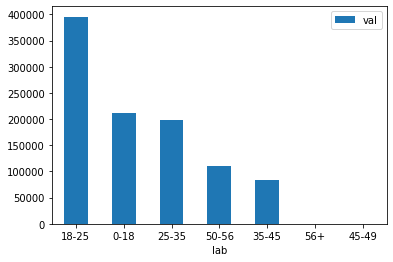

In [593]:
df1 = pd.DataFrame({'lab':df.columns, 'val':a})
ax = df1.plot.bar(x='lab', y='val', rot=0)

In [594]:
Master_Data.groupby('Rating')['Age'].agg(['count', 'size', 'nunique']).stack()

Rating         
1       count       56174
        size        56174
        nunique         7
2       count      107557
        size       107557
        nunique         7
3       count      261197
        size       261197
        nunique         7
4       count      348971
        size       348971
        nunique         7
5       count      226310
        size       226310
        nunique         7
dtype: int64

In [595]:
df2 = pd.DataFrame([Master_Data.Rating.value_counts()])
df2

,4,3,5,2,1
Rating,348971,261197,226310,107557,56174


In [596]:
b = df2.iloc[0]
print(b)

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64


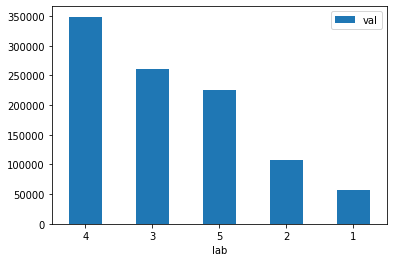

In [597]:
df3 = pd.DataFrame({'lab':df2.columns, 'val':b})
ax = df3.plot.bar(x='lab', y='val', rot=0)

In [598]:
Master_Data

,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,...,Mystery,Film-Noir,Documentary,Action,Year,Gender,Age,Occupation,Zip-code,AgeGroup
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,978824268,Toy Story (1995),True,False,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978824351,Pocahontas (1995),False,True,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978301777,Apollo 13 (1995),False,False,True,False,False,False,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,4,978300760,Star Wars: Episode IV - A New Hope (1977),False,False,False,True,True,False,False,...,False,False,False,True,1977,F,1,10,48067,0-18
1,5,978824195,Schindler's List (1993),False,False,True,False,False,False,True,...,False,False,False,False,1993,F,1,10,48067,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,4,960971696,Blood Simple (1984),False,False,True,False,False,False,False,...,False,True,False,False,1984,M,25,6,11106,18-25
6040,4,964828575,Mad Max 2 (a.k.a. The Road Warrior) (1981),False,False,False,False,False,False,False,...,False,False,False,True,1981,M,25,6,11106,18-25
6040,4,960971654,Serpico (1973),False,False,True,False,False,False,False,...,False,False,False,False,1973,M,25,6,11106,18-25


In [599]:
#Master_Data['Rating']
#df1 = Master_Data.groupby(['AgeGroup','Rating'])['Rating'].apply(list)
df1 = pd.DataFrame(Master_Data.groupby(['AgeGroup','Rating'])['Age'].count())
#df1 = Master_Data.groupby('AgeGroup')['Rating'].apply(list).reset_index(name='Rating')
df1

Age
AgeGroup Rating        
0-18     1        15301
         2        25056
         3        53981
         4        69049
         5        47360
18-25    1        23898
         2        44817
         3       104287
         4       136824
         5        85730
25-35    1         9067
         2        20253
         3        52990
         4        71983
         5        44710
35-45    1         3409
         2         8437
         3        22311
         4        30334
         5        19142
50-56    1         4499
         2         8994
         3        27628
         4        40781
         5        29368

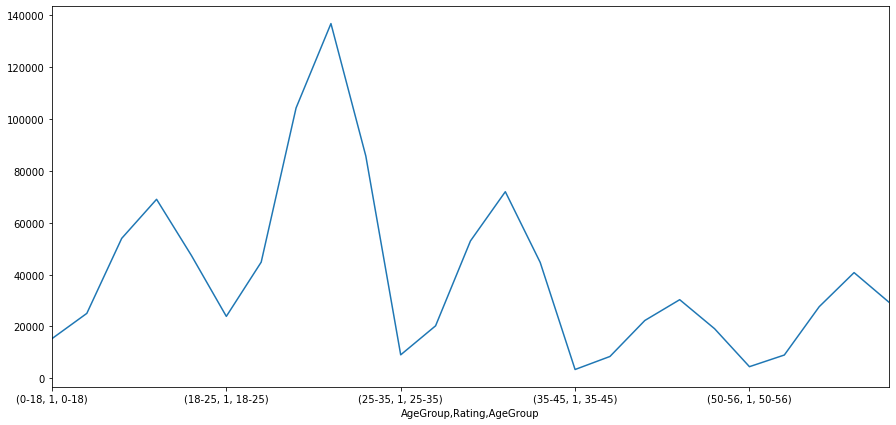

In [600]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
Master_Data.groupby(['AgeGroup','Rating'])["AgeGroup"].value_counts().plot(ax=ax)

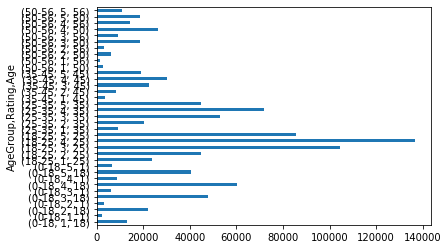

In [601]:
Master_Data.groupby(['AgeGroup','Rating']).Age.value_counts().plot.barh()

In [602]:
Master_Data

,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,...,Mystery,Film-Noir,Documentary,Action,Year,Gender,Age,Occupation,Zip-code,AgeGroup
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,978824268,Toy Story (1995),True,False,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978824351,Pocahontas (1995),False,True,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978301777,Apollo 13 (1995),False,False,True,False,False,False,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,4,978300760,Star Wars: Episode IV - A New Hope (1977),False,False,False,True,True,False,False,...,False,False,False,True,1977,F,1,10,48067,0-18
1,5,978824195,Schindler's List (1993),False,False,True,False,False,False,True,...,False,False,False,False,1993,F,1,10,48067,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,4,960971696,Blood Simple (1984),False,False,True,False,False,False,False,...,False,True,False,False,1984,M,25,6,11106,18-25
6040,4,964828575,Mad Max 2 (a.k.a. The Road Warrior) (1981),False,False,False,False,False,False,False,...,False,False,False,True,1981,M,25,6,11106,18-25
6040,4,960971654,Serpico (1973),False,False,True,False,False,False,False,...,False,False,False,False,1973,M,25,6,11106,18-25


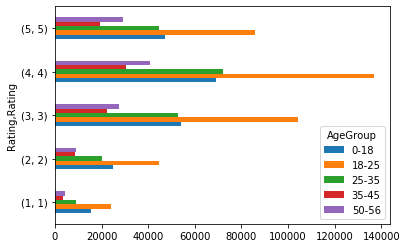

In [603]:
Master_Data.groupby(['AgeGroup','Rating']).Rating.value_counts().unstack(0).plot.barh()

In [604]:
groups = Master_Data.groupby('AgeGroup').agg({'Rating':lambda x: list(x)})
groups

,Rating
AgeGroup,
0-18,"[5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 3, 3, 3, 4, 3, ..."
18-25,"[4, 5, 4, 4, 4, 3, 3, 4, 5, 4, 5, 5, 4, 5, 5, ..."
25-35,"[4, 5, 5, 3, 5, 4, 5, 5, 4, 5, 4, 5, 4, 5, 4, ..."
35-45,"[5, 4, 4, 4, 2, 5, 5, 3, 4, 5, 5, 5, 5, 4, 5, ..."
45-49,[]
50-56,"[1, 2, 5, 4, 3, 3, 4, 3, 5, 4, 5, 4, 5, 2, 3, ..."
56+,[]


0  0                                                    1
   1    UserID
2       56
2       56
3       25
4     ...
1  0                                                    2
   1    UserID
2       56
2       56
2       56
2     ...
2  0                                                    3
   1    UserID
1        1
1        1
1        1
1     ...
3  0                                                    4
   1    UserID
1        1
1        1
1        1
1     ...
4  0                                                    5
   1    UserID
1        1
1        1
1        1
1     ...
dtype: object


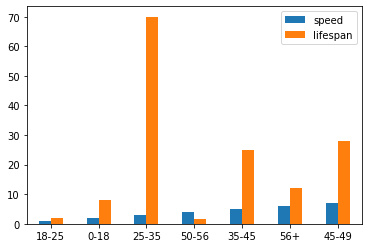

In [605]:
RatePerAgeGroup = pd.DataFrame(Master_Data.groupby('Rating')['Age']).stack()
print(RatePerAgeGroup)
speed = [1, 2, 3, 4, 5, 6, 7]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = df.columns
df4 = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df4.plot.bar(rot=0)

In [606]:
Master_Data

,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,...,Mystery,Film-Noir,Documentary,Action,Year,Gender,Age,Occupation,Zip-code,AgeGroup
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,978824268,Toy Story (1995),True,False,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978824351,Pocahontas (1995),False,True,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978301777,Apollo 13 (1995),False,False,True,False,False,False,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,4,978300760,Star Wars: Episode IV - A New Hope (1977),False,False,False,True,True,False,False,...,False,False,False,True,1977,F,1,10,48067,0-18
1,5,978824195,Schindler's List (1993),False,False,True,False,False,False,True,...,False,False,False,False,1993,F,1,10,48067,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,4,960971696,Blood Simple (1984),False,False,True,False,False,False,False,...,False,True,False,False,1984,M,25,6,11106,18-25
6040,4,964828575,Mad Max 2 (a.k.a. The Road Warrior) (1981),False,False,False,False,False,False,False,...,False,False,False,True,1981,M,25,6,11106,18-25
6040,4,960971654,Serpico (1973),False,False,True,False,False,False,False,...,False,False,False,False,1973,M,25,6,11106,18-25


In [607]:
Master_Data1 = Master_Data.copy

In [608]:
Master_Data

,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,...,Mystery,Film-Noir,Documentary,Action,Year,Gender,Age,Occupation,Zip-code,AgeGroup
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,978824268,Toy Story (1995),True,False,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978824351,Pocahontas (1995),False,True,False,False,False,True,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,5,978301777,Apollo 13 (1995),False,False,True,False,False,False,False,...,False,False,False,False,1995,F,1,10,48067,0-18
1,4,978300760,Star Wars: Episode IV - A New Hope (1977),False,False,False,True,True,False,False,...,False,False,False,True,1977,F,1,10,48067,0-18
1,5,978824195,Schindler's List (1993),False,False,True,False,False,False,True,...,False,False,False,False,1993,F,1,10,48067,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,4,960971696,Blood Simple (1984),False,False,True,False,False,False,False,...,False,True,False,False,1984,M,25,6,11106,18-25
6040,4,964828575,Mad Max 2 (a.k.a. The Road Warrior) (1981),False,False,False,False,False,False,False,...,False,False,False,True,1981,M,25,6,11106,18-25
6040,4,960971654,Serpico (1973),False,False,True,False,False,False,False,...,False,False,False,False,1973,M,25,6,11106,18-25


In [609]:
Master_Data1.set_index("Name", inplace=True)
Master_Data_TS = pd.DataFrame(Master_Data1.loc["Toy Story (1995)"])

AttributeError: 'function' object has no attribute 'set_index'

In [ ]:
Master_Data

In [ ]:
Master_Data_TS

In [ ]:
Master_Data_TS.groupby(['AgeGroup','Rating']).Rating.value_counts().unstack(0).plot.barh()

In [ ]:
#Master_Data.groupby(['AgeGroup','Rating']).Rating.value_counts().unstack(0).plot.barh()

In [ ]:
Master_Data_25 = Master_Data1.nlargest(25, 'Rating')

In [ ]:
Master_Data_25

In [ ]:
Top25 = pd.DataFrame(Master_Data1.groupby('Name').Rating.sum().nlargest(25))

In [ ]:
Top25

In [ ]:
Master_Data1

In [ ]:
Master_Data

In [ ]:
#Master_Data.set_index("UserID", inplace=True)
Master_Data_UID = pd.DataFrame(Master_Data.loc[2696])

In [ ]:
Master_Data_UID

In [ ]:
Master_Data_UID.groupby(['Name']).Rating.value_counts()

In [ ]:
Master_Data

In [ ]:
Master_Data.Comedy = Master_Data.Comedy.astype(int)
Master_Data.Romance = Master_Data.Romance.astype(int)
Master_Data.Drama = Master_Data.Drama.astype(int)
Master_Data.Adventure = Master_Data.Adventure.astype(int)
Master_Data.Fantasy = Master_Data.Fantasy.astype(int)
Master_Data["Children's"] = Master_Data["Children's"].astype(int)
Master_Data.War = Master_Data.War.astype(int)
Master_Data.Mystery = Master_Data.Mystery.astype(int)
Master_Data["Film-Noir"] = Master_Data["Film-Noir"].astype(int)
Master_Data.Documentary = Master_Data.Documentary.astype(int)
Master_Data.Action = Master_Data.Action.astype(int)
Master_Data.Animation = Master_Data.Animation.astype(int)
Master_Data.Crime = Master_Data.Crime.astype(int)
Master_Data.Horror = Master_Data.Horror.astype(int)
Master_Data.Musical = Master_Data.Musical.astype(int)
Master_Data.Romance = Master_Data.Romance.astype(int)
Master_Data.Western = Master_Data.Western.astype(int)